In [1]:
import sys
sys.path.append("..")

%load_ext autoreload
%autoreload 2

from sicm import io, analysis
from sicm.plots import plots
import glob
import os
import numpy as np

In [2]:
parent = "S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition"
files = glob.glob(parent + "/*/dev662_demods_[0-9]_sample_00000.csv")
files

['S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\\sweep_contact3_2_ethanol_000\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\\sweep_noncontact_1_001\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\\sweep_noncontact_000\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\\sweep_contact_2_1_000\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\\sweep_noncontact_1_000\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\\sweep_noncontact_2_000\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\\sweep_contact_2_2_000\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\\sweep_noncontact_2_1_000\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\\sweep_contact_1_000\\dev662_demods_0_sample_000

In [25]:
#(!) In Contact: chunk = 5, idx = 9, guess = (.001, 1e2, 31e3*2*np.pi, 1e2)
# In Contact: chunk = 1, idx = 3, guess = (.001, 1e2, 35.15e3*2*np.pi, 1e3)
# In Contact: chunk = 1, idx = 6, guess = (.001, 1e2, 35.15e3*2*np.pi, 1e3)
# In Contact: chunk = 0, idx = 8, guess = (.001, 1e2, 33.15e3*2*np.pi, 1e3)

#(!) NOT Contact: chunk = 1, idx = 5, guess = (.015, 1e4, 32.78e3*2*np.pi, 1)

In [13]:
chunk = 1 #1
idx =  5 #5
datadir = os.path.dirname(files[idx])
file = os.path.basename(files[idx])
print("Using data from {}.".format(datadir))

Using data from S:/UsersData/Martin/2018/12_Dec/10/qtf_deposition\sweep_noncontact_2_000.


Exctracting chunk 1 from file S:\UsersData\Martin\2018\12_Dec\10\qtf_deposition\sweep_noncontact_2_000\dev662_demods_0_sample_00000.csv.
Experiment time: 10/12/2018 10:08, # of points: 500


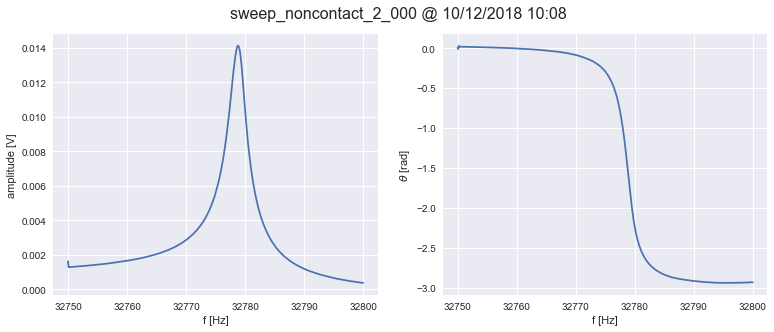

In [14]:
data, date = io.load_data_lockin(datadir, file, chunk)
plots.plot_lockin(data, date = date, name = datadir.split("\\")[-1],
                  keys = list(zip(2*["frequency"], ["r", "phase"])))

Expecting 4 paramters in fit.
Fitting Fitter.lorentzian_fun to 500 datapoints ...
Found parameters: [1.41301920e-02 1.16064981e+04 2.05955208e+05 4.96515402e+02].
Finished in 0.002 s
Presumed Resonator Parameters: 
{'R': 23750, 'L': 1338.418835893695, 'C': 1.7614178836598412e-14, 'C0': 8.745711084336464e-12, 'I0': 5.949554523807948e-07, 'V0': 0.014130191994043875}


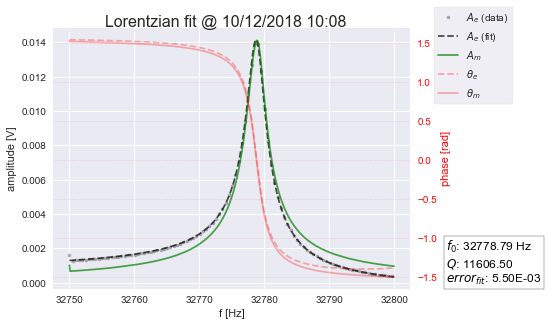

In [15]:
# TODO: add selction of frequency range
# TODO: For verly low-Q oscillators, the f0 shifts. Is this to be expected?
from math import ceil

guess = (.001, 1e2, 31e3*2*np.pi, 1e2) # idx9
guess = (.015, 1e4, 32.78e3*2*np.pi, 1) # idx5
# guess = (.001, 1e2, 33.15e3*2*np.pi, 1e3)
# Driving voltage
V_out = ceil(1e5*(max(data["r"]) * np.sqrt(2)))/1e5
fitter = analysis.Fitter([data["frequency"], data["r"], data["phase"]+np.pi/2],
                         V_out, guess, date)
fitter.process()

In [47]:
np.max(fitter.r_m)

0.014117570540152622

# Another Experiment

In [54]:
parent = "S:/UsersData/Martin/2018/12_Dec/12/session_20181212_142119_00"
files = glob.glob(parent + "/*/dev662_demods_[0-9]_sample_00000.csv")
files

['S:/UsersData/Martin/2018/12_Dec/12/session_20181212_142119_00\\sweep_contact_water_attheend_000\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/12/session_20181212_142119_00\\sweep_test_000\\dev662_demods_0_sample_00000.csv',
 'S:/UsersData/Martin/2018/12_Dec/12/session_20181212_142119_00\\sweep_contact_water_000\\dev662_demods_0_sample_00000.csv']

In [55]:
chunk = 0
idx = 0
datadir = os.path.dirname(files[idx])
file = os.path.basename(files[idx])
print("Using data from {}.".format(datadir))

Using data from S:/UsersData/Martin/2018/12_Dec/12/session_20181212_142119_00\sweep_contact_water_attheend_000.


Exctracting chunk 0 from file S:\UsersData\Martin\2018\12_Dec\12\session_20181212_142119_00\sweep_contact_water_attheend_000\dev662_demods_0_sample_00000.csv.
Experiment time: 12/12/2018 18:52, # of points: 500


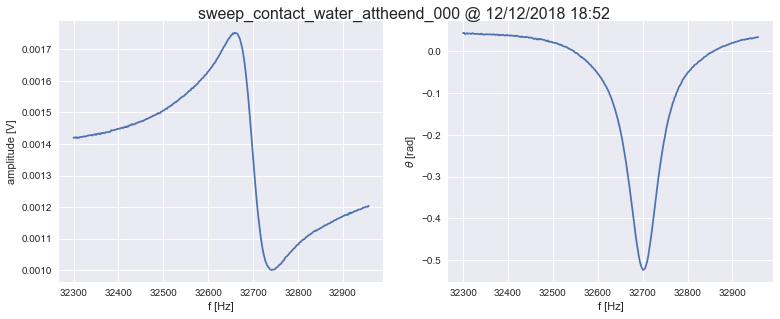

In [56]:
data, date = io.load_data_lockin(datadir, file, chunk)
plots.plot_lockin(data, date = date, name = datadir.split("\\")[-1],
                  keys = list(zip(2*["frequency"], ["r", "phase"])))

Expecting 4 paramters in fit.
Fitting Fitter.lorentzian_fun to 329 datapoints ...
Found parameters: [7.63560773e-04 3.59989834e+02 2.05389526e+05 6.27750610e+02].
Finished in 0.004 s


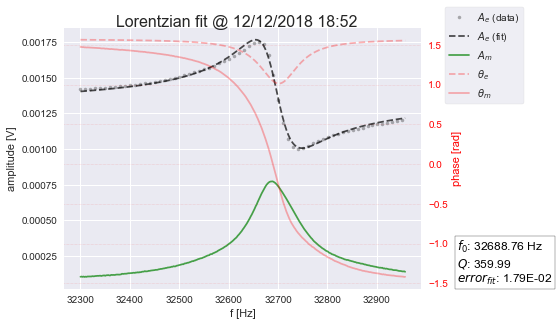

In [58]:
guess = (.001, 1e2, 32.6e3*2*np.pi, 1e2)
# guess = (.015, 1e4, 32.78e3*2*np.pi, 1)
# guess = (.001, 1e2, 33.15e3*2*np.pi, 1e3)
fitter = analysis.Fitter([data["frequency"], data["r"], data["phase"]+np.pi/2],
                         guess, date)
fitter.process()

In [39]:
np.max(fitter.r_m)

0.0007731064813141753

In [50]:
import os

['.ipynb_checkpoints', 'plots.ipynb', 'qtf_calibration.ipynb']

-------
## Not used anymore

32786.0

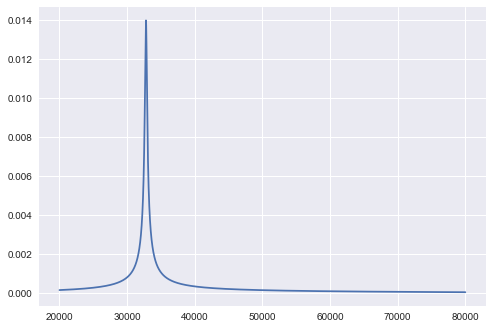

In [152]:
import matplotlib.pyplot as plt
import numpy as np
xx = np.arange(2e4, 8e4)
# xx = data["frequency"]
yy = analysis.Fitter.lorentzian_fun(xx, *(.014, 1e2, 20.6e4, .1))
plt.plot(xx, yy)
xx[np.argmax(yy)]